# Data Preparation and First Simple Model
## Exploring and Predicting EV Registration Data

Daniel Gieseke | August 2023

The electric vehicle (EV) industry is booming at every level, and companies in the burgeoning industry are aiming to understand the different factors that affect EV adoption, and the geographic spread of EVs such that they can adequately prepare and market themselves.  This project aims to take in real world data on EV registrations by zip code along with several socioeconomic factors by zip code, find the variance and correlation between these features, and ultimately build a machine learning model that can predict EV registration by zip code such that we can understand the factors that affect EV adoption.


**About this notebook:**

This notebook contains my initial data preparation, cleaning, and feature engineering along with my first simple models.  Please visit my other notebook to see my visualizations and exploratory data analysis.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid", {"font.family": "Helvetica"})
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from uszipcode import SearchEngine
import mpu
import zipcodes
import warnings
warnings.filterwarnings("ignore")

/Users/danielgieseke/anaconda3/envs/learn-env/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Loading Electric Vehicle (EV) Registration Data into Pandas Dataframes

In [2]:
# New York EV Registrations
df_ny = pd.read_csv('NY_EV_Registrations.csv')

df_ny.head()

State ZIP Code Registration Date Vehicle Make Vehicle Model  \
0    NY    10001         12/1/2018        TESLA       MODEL 3   
1    NY    14425         12/1/2018        TESLA       MODEL 3   
2    NY    13851         12/1/2018        TESLA       MODEL 3   
3    NY    12308         12/1/2018        TESLA       MODEL 3   
4    NY    14031         12/1/2018        TESLA       MODEL 3   

   Vehicle Model Year Drivetrain Type Vehicle GVWR Class  \
0              2018.0             BEV                  1   
1              2018.0             BEV                  1   
2              2018.0             BEV                  1   
3              2018.0             BEV                  1   
4              2018.0             BEV                  1   

          Vehicle Category  Vehicle Count  DMV Snapshot ID  \
0  Light-Duty (Class 1-2A)              1               31   
1  Light-Duty (Class 1-2A)              1               31   
2  Light-Duty (Class 1-2A)              1               31   
3  Light-Duty (Class 1-2A)              1               31   
4  Light-Duty (Class 1-2A)              1               31   

         DMV Snapshot (Date)  Latest DMV Snapshot Flag  
0  DMV Snapshot (10/11/2019)                     False  
1  DMV Snapshot (10/11/2019)                     False  
2  DMV Snapshot (10/11/2019)                     False  
3  DMV Snapshot (10/11/2019)                     False  
4  DMV Snapshot (10/11/2019)                     False

In [3]:
# Limiting NY dataframe to the DMV Snapshot from 1/3/2023
df_ny = df_ny.loc[(df_ny['DMV Snapshot (Date)'] == 'DMV Snapshot (1/3/2023)')]

In [4]:
# New Jersey EV Registrations
df_nj = pd.read_csv('NJ_EV_Registrations.csv')

df_nj.head()

State ZIP Code Registration Date Vehicle Make Vehicle Model  \
0    NJ    08858         12/1/2017        TESLA       MODEL S   
1    NJ    07722         12/1/2017        TESLA       MODEL S   
2    NJ    07463         12/1/2017        TESLA       MODEL S   
3    NJ    08096         12/1/2017        TESLA       MODEL S   
4    NJ    08902         12/1/2017        TESLA       MODEL S   

   Vehicle Model Year Drivetrain Type Vehicle GVWR Class  \
0                2015             BEV                  1   
1                2015             BEV                  1   
2                2015             BEV                  1   
3                2015             BEV                  1   
4                2015             BEV                  1   

          Vehicle Category  Vehicle Count  DMV Snapshot ID  \
0  Light-Duty (Class 1-2A)              1                3   
1  Light-Duty (Class 1-2A)              1                3   
2  Light-Duty (Class 1-2A)              1                3   
3  Light-Duty (Class 1-2A)              1                3   
4  Light-Duty (Class 1-2A)              1                3   

         DMV Snapshot (Date)  Latest DMV Snapshot Flag  
0  DMV Snapshot (12/31/2017)                     False  
1  DMV Snapshot (12/31/2017)                     False  
2  DMV Snapshot (12/31/2017)                     False  
3  DMV Snapshot (12/31/2017)                     False  
4  DMV Snapshot (12/31/2017)                     False

In [5]:
# Limiting NJ dataframe to the DMV Snapshot from 12/31/2022
df_nj = df_nj.loc[(df_nj['DMV Snapshot (Date)'] == 'DMV Snapshot (12/31/2022)')]

In [130]:
# Connecticut EV Registrations
df_ct = pd.read_csv('CT_EV_Registrations.csv')

df_ct.head()

State ZIP Code Registration Date Vehicle Make Vehicle Model  \
0    CT    06066          9/1/2021        TESLA       MODEL 3   
1    CT    06906          9/1/2021        TESLA       MODEL 3   
2    CT    06905          9/1/2021        TESLA       MODEL 3   
3    CT    06037          9/1/2021        TESLA       MODEL 3   
4    CT    06111          9/1/2021        TESLA       MODEL 3   

   Vehicle Model Year Drivetrain Type Vehicle GVWR Class  \
0                2021             BEV                  1   
1                2021             BEV                  1   
2                2021             BEV                  1   
3                2021             BEV                  1   
4                2021             BEV                  1   

          Vehicle Category  Vehicle Count  DMV Snapshot ID  \
0  Light-Duty (Class 1-2A)              1                1   
1  Light-Duty (Class 1-2A)              1                1   
2  Light-Duty (Class 1-2A)              1                1   
3  Light-Duty (Class 1-2A)              1                1   
4  Light-Duty (Class 1-2A)              1                1   

       DMV Snapshot (Date)  Latest DMV Snapshot Flag  
0  DMV Snapshot (4/1/2022)                     False  
1  DMV Snapshot (4/1/2022)                     False  
2  DMV Snapshot (4/1/2022)                     False  
3  DMV Snapshot (4/1/2022)                     False  
4  DMV Snapshot (4/1/2022)                     False

In [136]:
# Limiting CT dataframe to the DMV Snapshot from 12/31/2022
df_ct = df_ct.loc[(df_ct['DMV Snapshot (Date)'] == 'DMV Snapshot (12/31/2022)')]

### Grouping Each Dataframe by Zip Code

In [137]:
# Connecticut Grouped Dataframe
df_ct = df_ct[['ZIP Code', 'Vehicle Count']]
df_ct = df_ct.groupby(['ZIP Code']).sum()
df_ct['CT'] = 1
df_ct.head()

Vehicle Count  CT
ZIP Code                   
01040                 1   1
01581                 1   1
01757                 2   1
02142                 2   1
02151                 1   1

In [138]:
df_ct = df_ct.reset_index()

In [143]:
# Ensuring Dataframe only includes zip codes in Connecticut
zips = df_ct['ZIP Code']
valid = []

for code in zips:
    if code == 'Error':
        valid.append(0)
    else:
        state = zipcodes.matching(code)[0]['state']
        if state == 'CT':
            valid.append(1)
        else:
            valid.append(0)

df_ct['valid'] = valid
df_ct = df_ct.loc[(df_ct['valid'] == 1)]
df_ct = df_ct.drop(columns='valid')

In [11]:
# New Jersey Grouped Dataframe
df_nj = df_nj[['ZIP Code', 'Vehicle Count']]
df_nj = df_nj.groupby(['ZIP Code']).sum()
df_nj['NJ'] = 1
df_nj.head()

Vehicle Count  NJ
ZIP Code                   
01070                 1   1
01258                 1   1
01501                 2   1
01757                 3   1
02135                 1   1

In [12]:
df_nj = df_nj.reset_index()

In [13]:
# Ensuring Dataframe only includes zip codes in New Jersey
zips = df_nj['ZIP Code']
valid = []

for code in zips:
    if code == 'Error':
        valid.append(0)
    else:
        state = zipcodes.matching(code)[0]['state']
        if state == 'NJ':
            valid.append(1)
        else:
            valid.append(0)

df_nj['valid'] = valid
df_nj = df_nj.loc[(df_nj['valid'] == 1)]
df_nj = df_nj.drop(columns='valid')

In [14]:
df_nj.head()

ZIP Code  Vehicle Count  NJ
17    07001             67   1
18    07002            292   1
19    07003            376   1
20    07004            143   1
21    07005            216   1

In [15]:
# New York Grouped Dataframe
df_ny['ZIP Code'] = df_ny['ZIP Code'].astype(str)
df_ny = df_ny[['ZIP Code', 'Vehicle Count']]
df_ny = df_ny.groupby(['ZIP Code']).sum()
df_ny['NY'] = 1
df_ny.head()

Vehicle Count  NY
ZIP Code                   
02048                 1   1
02116                 1   1
02155                 1   1
02301                 1   1
02338                 1   1

In [16]:
df_ny = df_ny.reset_index()

In [17]:
# Ensuring Dataframe only includes zip codes in New York
zips = list(df_ny['ZIP Code'])
valid = []

for code in zips:
    if code == 'Error':
        valid.append(0)
    elif len(code) < 5:
        valid.append(0)
    else:
        state = zipcodes.matching(code)[0]['state']
        if state == 'NY':
            valid.append(1)
        else:
            valid.append(0)

df_ny['valid'] = valid
df_ny = df_ny.loc[(df_ny['valid'] == 1)]
df_ny = df_ny.drop(columns='valid')

In [18]:
df_ny.head()

ZIP Code  Vehicle Count  NY
29     06390              6   1
130    10001            137   1
131    10002            151   1
132    10003            224   1
133    10004            129   1

### Importing Income Information for Tri-State Area
Source: https://data.census.gov/

In [145]:
df_income = pd.read_csv('Income Data/ACSST5Y2021.S1903-Data.csv')

In [146]:
# Column 'S1903_C03_015E' gives an estimate of median family household income--which I believe will be an 
# important variable
df_income = df_income[['NAME', 'S1903_C03_015E']]

In [147]:
# Dropping first row which includes meta data
df_income = df_income.drop(index=0)
df_income.head()

NAME S1903_C03_015E
1  ZCTA5 06001         166235
2  ZCTA5 06002          97917
3  ZCTA5 06010          91605
4  ZCTA5 06013         156442
5  ZCTA5 06016         118345

In [148]:
# renaming columns
df_income = df_income.rename(columns={'NAME': 'ZIP Code', 'S1903_C03_015E': 'Median Family Household Income'})

In [149]:
# dropping unwanted strings and rows from zip code and median income columns
df_income['ZIP Code'] = df_income['ZIP Code'].str.replace(r'ZCTA5 ', '', regex=True)
df_income['Median Family Household Income'] = df_income['Median Family Household Income'].str.replace('+', '')
df_income['Median Family Household Income'] = df_income['Median Family Household Income'].str.replace(',', '')
df_income = df_income[df_income['Median Family Household Income'].str.contains('-')==False]

In [150]:
# Changing type of Income Column
df_income['Median Family Household Income'] = df_income['Median Family Household Income'].astype('int')

In [151]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 1 to 2712
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ZIP Code                        2442 non-null   object
 1   Median Family Household Income  2442 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.2+ KB


### Importing Population Information for Tri-State Area
Source: https://data.census.gov/

In [152]:
df_pop = pd.read_csv('Population Data/DECENNIALDHC2020.P1-Data.csv')

In [153]:
df_pop.head()

GEO_ID                  NAME   P1_001N                P1_001NA  \
0       Geography  Geographic Area Name   !!Total  Annotation of  !!Total   
1  860Z200US06001           ZCTA5 06001     19262                     NaN   
2  860Z200US06002           ZCTA5 06002     21579                     NaN   
3  860Z200US06010           ZCTA5 06010     60748                     NaN   
4  860Z200US06013           ZCTA5 06013      9519                     NaN   

   Unnamed: 4  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [154]:
# Limiting DF to relevant columns
df_pop = df_pop[['NAME', 'P1_001N']]

In [155]:
# Dropping first row which includes meta data
df_pop = df_pop.drop(index=0)

In [156]:
# renaming columns
df_pop = df_pop.rename(columns={'NAME': 'ZIP Code', 'P1_001N': 'Population'})

In [157]:
# dropping unwanted strings and rows from zip code and median income columns
df_pop['ZIP Code'] = df_pop['ZIP Code'].str.replace(r'ZCTA5 ', '', regex=True)

In [158]:
# Changing type of Population Column
df_pop['Population'] = df_pop['Population'].astype('int')

In [159]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 1 to 2712
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP Code    2712 non-null   object
 1   Population  2712 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.5+ KB


### Importing Education Information for Tri-State Area
Source: https://data.census.gov/

In [160]:
df_ed = pd.read_csv('Education Data/ACSST5Y2021.S1501-Data.csv')

In [161]:
df_ed.head()

GEO_ID                  NAME  \
0       Geography  Geographic Area Name   
1  860Z200US06001           ZCTA5 06001   
2  860Z200US06002           ZCTA5 06002   
3  860Z200US06010           ZCTA5 06010   
4  860Z200US06013           ZCTA5 06013   

                                      S1501_C01_001E  \
0  Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...   
1                                                975   
2                                               1376   
3                                               4802   
4                                                522   

                                      S1501_C01_001M  \
0  Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...   
1                                                271   
2                                                380   
3                                                544   
4                                                156   

                                     S1501_C01_001MA  \
0  Annotation of Margin of Error!!Total!!AGE BY E...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     S1501_C01_001EA  \
0  Annotation of Estimate!!Total!!AGE BY EDUCATIO...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      S1501_C01_002E  \
0  Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...   
1                                                 80   
2                                                226   
3                                                666   
4                                                 28   

                                      S1501_C01_002M  \
0  Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...   
1                                                 60   
2                                                158   
3                                                194   
4                                                 28   

                                     S1501_C01_002MA  \
0  Annotation of Margin of Error!!Total!!AGE BY E...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     S1501_C01_002EA  ...  \
0  Annotation of Estimate!!Total!!AGE BY EDUCATIO...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4                                                NaN  ...   

                                     S1501_C06_062EA  \
0  Annotation of Estimate!!Percent Female!!MEDIAN...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                      S1501_C06_063E  \
0  Estimate!!Percent Female!!MEDIAN EARNINGS IN T...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                     S1501_C06_063EA  \
0  Annotation of Estimate!!Percent Female!!MEDIAN...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

               

In [162]:
# Limiting DF to relevant columns
df_ed = df_ed[['NAME', 'S1501_C02_021E', 'S1501_C01_021E']]

In [163]:
# Dropping first row which includes meta data
df_ed = df_ed.drop(index=0)

In [164]:
# renaming columns per data dictionary - making education columns more readable
df_ed = df_ed.rename(columns={'NAME': 'ZIP Code', 'S1501_C02_021E': 'Percent Pop. Bachelors Deg. - 35-44', 
                              'S1501_C01_021E': 'Total Pop. Bachelors Deg. - 35-44'})

In [165]:
# dropping unwanted strings and rows from zip code
df_ed['ZIP Code'] = df_ed['ZIP Code'].str.replace(r'ZCTA5 ', '', regex=True)
df_ed = df_ed[df_ed['Percent Pop. Bachelors Deg. - 35-44'].str.contains('-')==False]

In [166]:
# Changing type of Educational Attainment Columns
df_ed['Percent Pop. Bachelors Deg. - 35-44'] = df_ed['Percent Pop. Bachelors Deg. - 35-44'].astype('float')
df_ed['Total Pop. Bachelors Deg. - 35-44'] = df_ed['Total Pop. Bachelors Deg. - 35-44'].astype('int')

In [167]:
# Inspecting final df_ed
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2509 entries, 1 to 2712
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ZIP Code                             2509 non-null   object 
 1   Percent Pop. Bachelors Deg. - 35-44  2509 non-null   float64
 2   Total Pop. Bachelors Deg. - 35-44    2509 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 78.4+ KB


### Joining all EV Registration, Population, Income, and Education Dataframes

In [168]:
df_tri = pd.concat([df_ny, df_nj, df_ct])

In [169]:
df_tri = df_tri.groupby(['ZIP Code']).sum()

In [170]:
df_tri.reset_index(inplace=True)

In [171]:
df_tri

ZIP Code  Vehicle Count   NY   NJ   CT
0       06001            351  0.0  0.0  1.0
1       06002            126  0.0  0.0  1.0
2       06010            200  0.0  0.0  1.0
3       06011              1  0.0  0.0  1.0
4       06013             99  0.0  0.0  1.0
...       ...            ...  ...  ...  ...
2674    14901             14  1.0  0.0  0.0
2675    14902              1  1.0  0.0  0.0
2676    14903             46  1.0  0.0  0.0
2677    14904             18  1.0  0.0  0.0
2678    14905             49  1.0  0.0  0.0

[2679 rows x 5 columns]

In [172]:
df_tri = df_tri.merge(df_income, on='ZIP Code', how='left')

In [173]:
df_tri = df_tri.merge(df_pop, on='ZIP Code', how='left')

In [174]:
df_tri = df_tri.merge(df_ed, on='ZIP Code', how='left')

In [175]:
df_tri['NY'] = df_tri['NY'].fillna(0)
df_tri['NJ'] = df_tri['NJ'].fillna(0)
df_tri['CT'] = df_tri['CT'].fillna(0)

In [176]:
df_tri = df_tri.dropna(subset=['Population'])

In [177]:
df_tri = df_tri.dropna(subset=['Percent Pop. Bachelors Deg. - 35-44'])

In [178]:
df_tri = df_tri.dropna(subset=['Total Pop. Bachelors Deg. - 35-44'])

In [179]:
df_tri = df_tri.dropna(subset=['Median Family Household Income'])

In [180]:
df_tri.head()

ZIP Code  Vehicle Count   NY   NJ   CT  Median Family Household Income  \
0    06001            351  0.0  0.0  1.0                        166235.0   
1    06002            126  0.0  0.0  1.0                         97917.0   
2    06010            200  0.0  0.0  1.0                         91605.0   
4    06013             99  0.0  0.0  1.0                        156442.0   
5    06016             29  0.0  0.0  1.0                        118345.0   

   Population  Percent Pop. Bachelors Deg. - 35-44  \
0     19262.0                                 80.8   
1     21579.0                                 37.0   
2     60748.0                                 39.7   
4      9519.0                                 60.4   
5      6273.0                                 57.5   

   Total Pop. Bachelors Deg. - 35-44  
0                             2069.0  
1                              907.0  
2                             3228.0  
4                              890.0  
5                              385.0

In [181]:
df_tri['EVs per capita'] = (df_tri['Vehicle Count']/df_tri['Population'])*100000

In [182]:
df_tri

ZIP Code  Vehicle Count   NY   NJ   CT  Median Family Household Income  \
0       06001            351  0.0  0.0  1.0                        166235.0   
1       06002            126  0.0  0.0  1.0                         97917.0   
2       06010            200  0.0  0.0  1.0                         91605.0   
4       06013             99  0.0  0.0  1.0                        156442.0   
5       06016             29  0.0  0.0  1.0                        118345.0   
...       ...            ...  ...  ...  ...                             ...   
2673    14897              2  1.0  0.0  0.0                         46336.0   
2674    14901             14  1.0  0.0  0.0                         45179.0   
2676    14903             46  1.0  0.0  0.0                         78329.0   
2677    14904             18  1.0  0.0  0.0                         63986.0   
2678    14905             49  1.0  0.0  0.0                         84946.0   

      Population  Percent Pop. Bachelors Deg. - 35-44  \
0        19262.0                                 80.8   
1        21579.0                                 37.0   
2        60748.0                                 39.7   
4         9519.0                                 60.4   
5         6273.0                                 57.5   
...          ...                                  ...   
2673       850.0                                 15.9   
2674     14893.0                                 13.3   
2676      7279.0                                 25.2   
2677     15102.0                                 16.6   
2678      8645.0                                 39.8   

      Total Pop. Bachelors Deg. - 35-44  EVs per capita  
0                                2069.0     1822.240681  
1                                 907.0      583.901015  
2                                3228.0      329.228946  
4                                 890.0     1040.025213  
5                                 385.0      462.298741  
...                                 ...             ...  
2673                               24.0      235.294118  
2674                              285.0       94.003894  
2676                              202.0      631.954939  
2677                              309.0      119.189511  
2678                              371.0      566.801619  

[2326 rows x 10 columns]

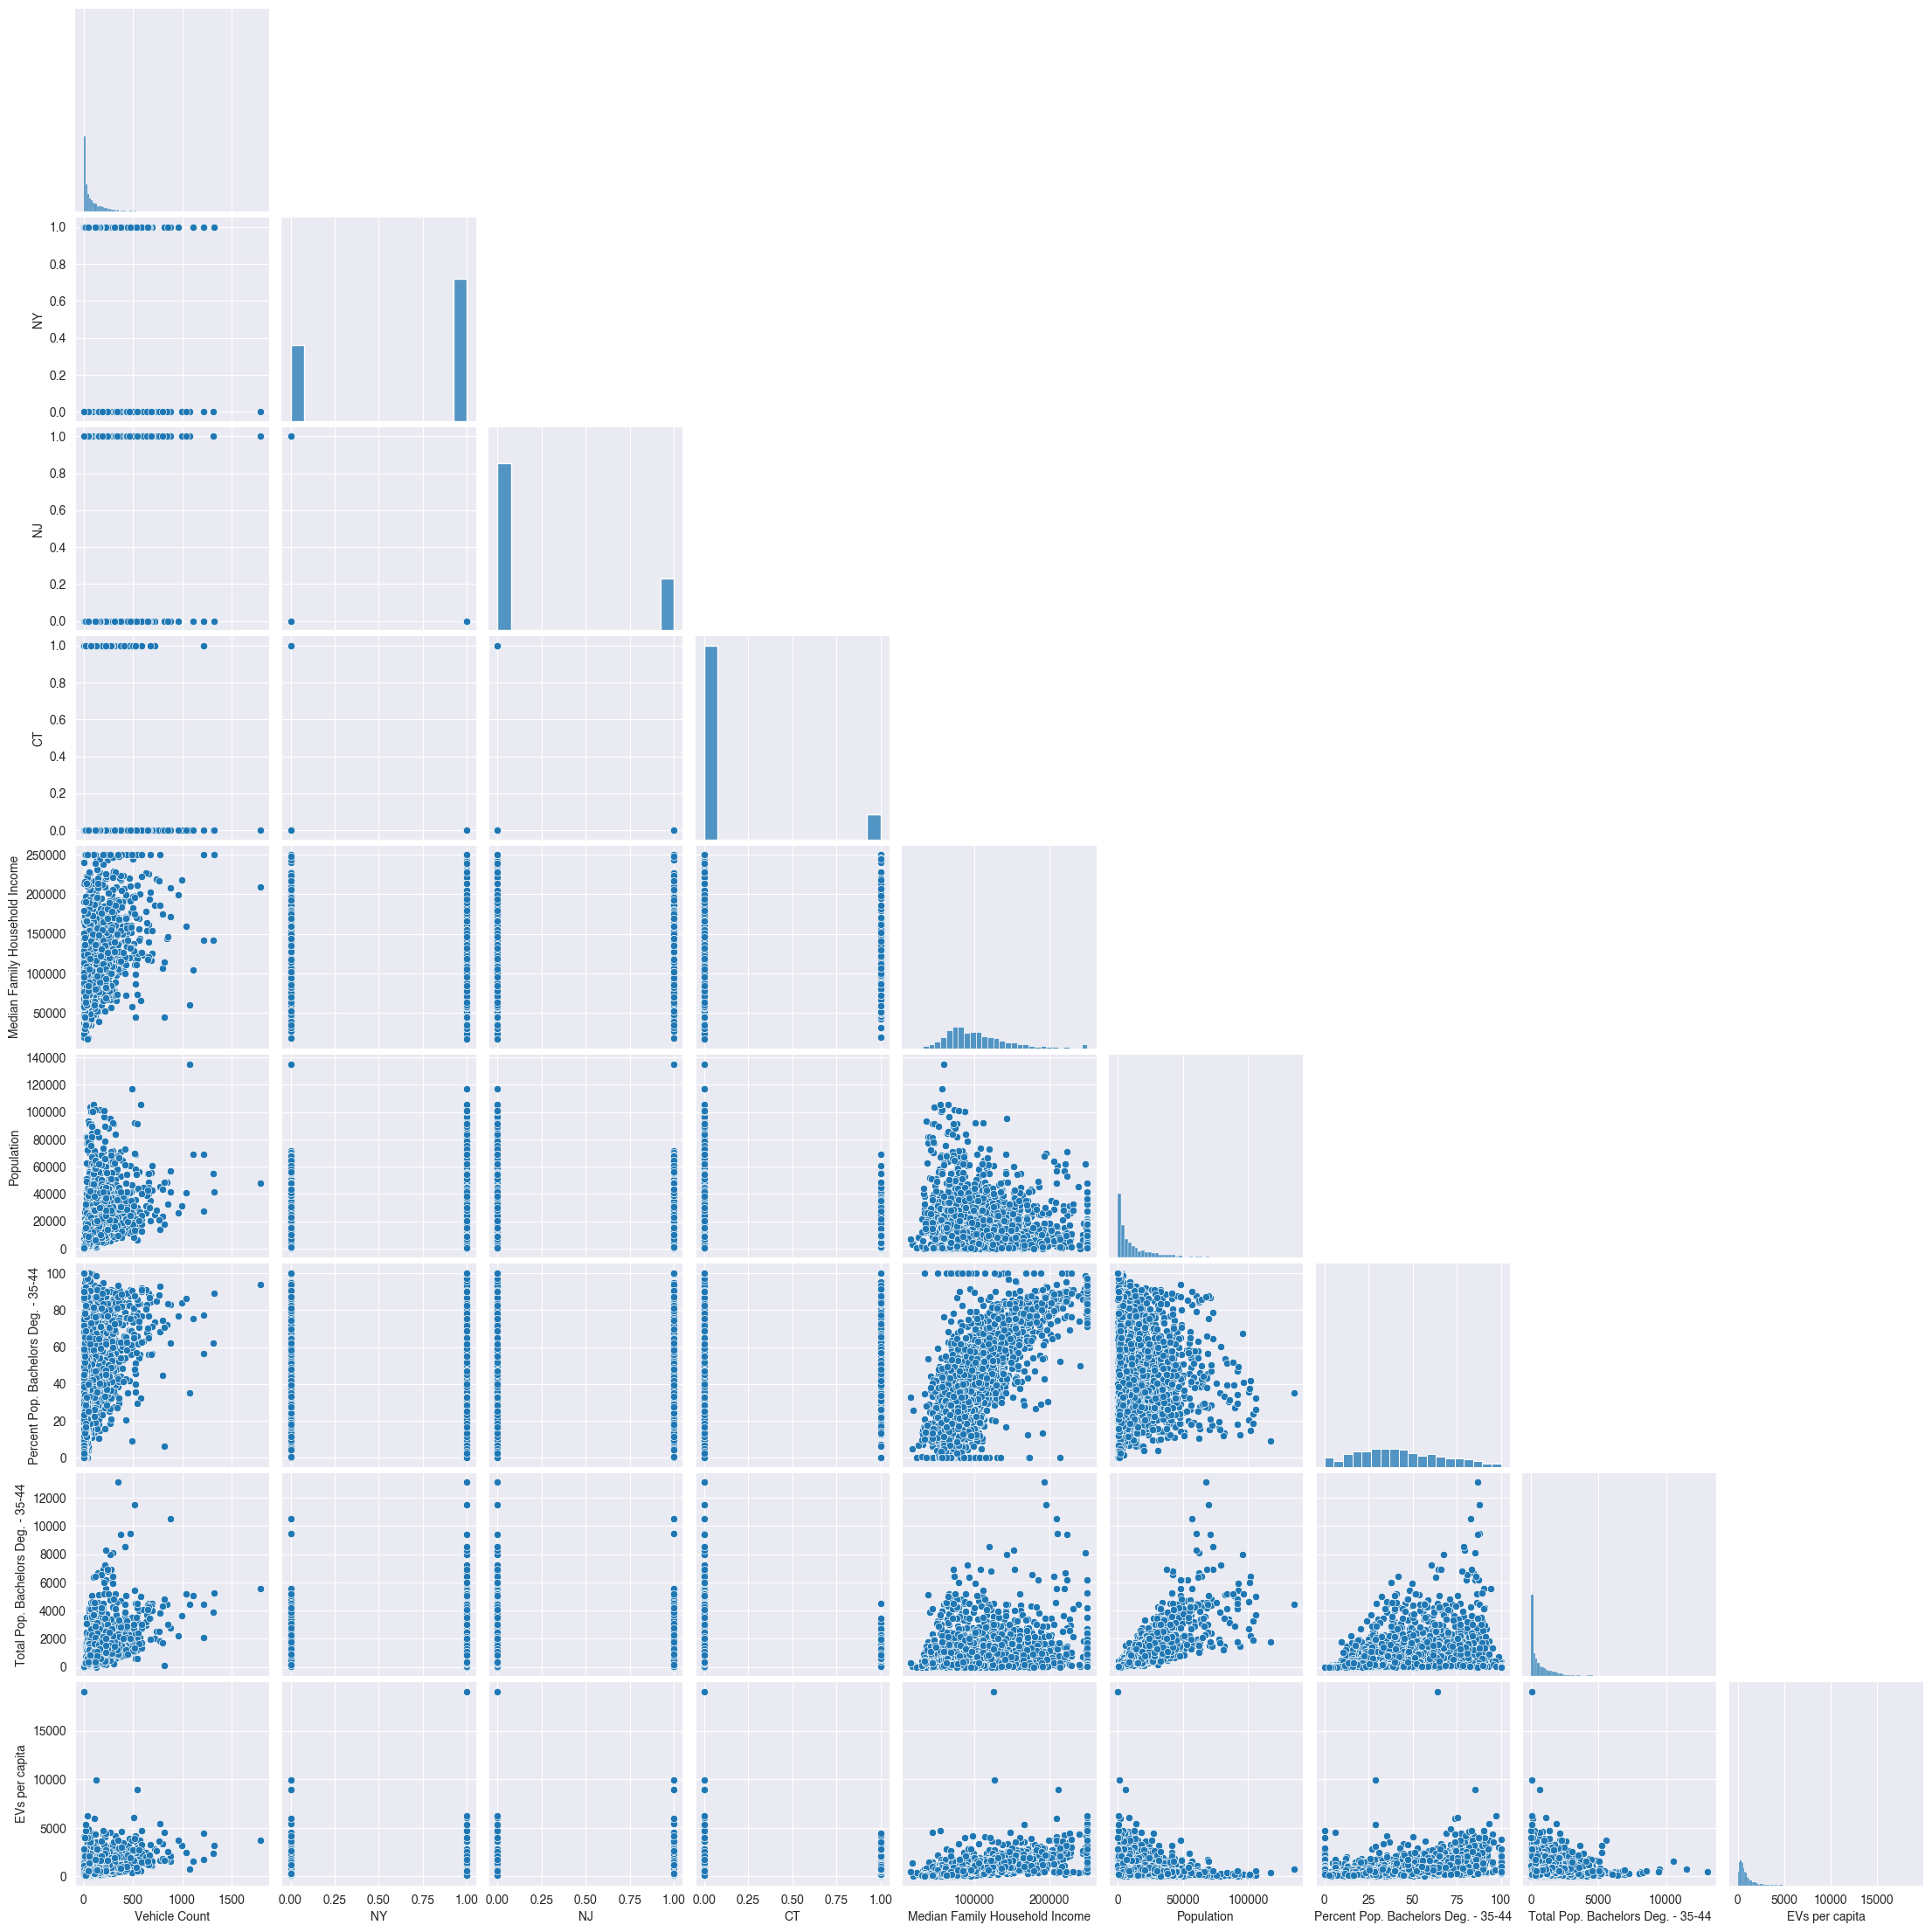

In [57]:
sns.pairplot(df_tri, corner=True);

### NYC Zip Codes
Data Source: https://namecensus.com/zip-codes/new-york/city/new-york/

In [183]:
df_nyc = pd.read_csv('NYC Zip Codes.csv')

In [184]:
# Creating loop for a boolean indicating if ZIP Code is in NYC
nyc_zips = list(df_nyc['ZIP Code'])
all_zips = df_tri['ZIP Code']

In [185]:
in_NYC = []

for zip_ in all_zips:
    if zip_ in nyc_zips:
        in_NYC.append(1)
    else:
        in_NYC.append(0)

In [186]:
df_tri['in_NYC'] = in_NYC

### Creating Variables for Distance from NYC

In [187]:
zips = df_tri['ZIP Code']
dist_NYC = []

for code in zips:
    search = SearchEngine()
    
    zip_NYC = search.by_zipcode('10001')
    lat_NYC = zip_NYC.lat
    long_NYC = zip_NYC.lng
    
    zip2 = search.by_zipcode(code)
    lat2 = zip2.lat
    long2 = zip2.lng
    
    dist = mpu.haversine_distance((lat_NYC,long_NYC),(lat2,long2))
    
    dist_NYC.append(dist)

In [188]:
df_tri['dist_NYC'] = dist_NYC
df_tri.head()

ZIP Code  Vehicle Count   NY   NJ   CT  Median Family Household Income  \
0    06001            351  0.0  0.0  1.0                        166235.0   
1    06002            126  0.0  0.0  1.0                         97917.0   
2    06010            200  0.0  0.0  1.0                         91605.0   
4    06013             99  0.0  0.0  1.0                        156442.0   
5    06016             29  0.0  0.0  1.0                        118345.0   

   Population  Percent Pop. Bachelors Deg. - 35-44  \
0     19262.0                                 80.8   
1     21579.0                                 37.0   
2     60748.0                                 39.7   
4      9519.0                                 60.4   
5      6273.0                                 57.5   

   Total Pop. Bachelors Deg. - 35-44  EVs per capita  in_NYC    dist_NYC  
0                             2069.0     1822.240681       0  152.284815  
1                              907.0      583.901015       0  158.598943  
2                             3228.0      329.228946       0  136.215196  
4                              890.0     1040.025213       0  142.022317  
5                              385.0      462.298741       0  176.673504

### Creating "High Population" Area Feature

Median ZIP Code Population in Data Set: 6926.0


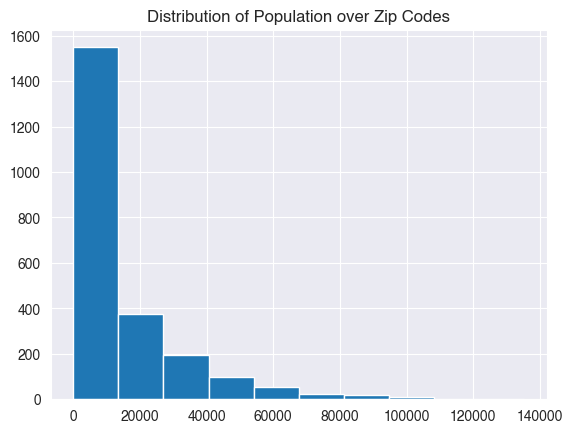

In [189]:
print("Median ZIP Code Population in Data Set:", df_tri['Population'].median())
df_tri['Population'].hist().set(Title='Distribution of Population over Zip Codes');

In [190]:
pops = df_tri['Population']
high_pop = []

for pop in pops:
    if pop >= 10000:
        high_pop.append(1)
    else:
        high_pop.append(0)

df_tri['high_pop'] = high_pop

### Creating County-Level Voting Column
Data Source: https://www.kaggle.com/datasets/unanimad/us-election-2020?resource=download&select=president_county_candidate.csv

In [191]:
# Adding column to main dataframe to merge with election data
zips = df_tri['ZIP Code']
counties = []

for code in zips:
    county = zipcodes.matching(code)[0]['county']
    counties.append(county)
    

df_tri['County'] = counties

In [196]:
df_pol = pd.read_csv('2020 Election Results by County.csv')
df_pol

state             county      candidate party  total_votes    won
0      Delaware        Kent County      Joe Biden   DEM        44552   True
1      Delaware        Kent County   Donald Trump   REP        41009  False
2      Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3      Delaware        Kent County  Howie Hawkins   GRN          420  False
4      Delaware  New Castle County      Joe Biden   DEM       195034   True
...         ...                ...            ...   ...          ...    ...
32172   Arizona    Maricopa County      Write-ins   WRI         1331  False
32173   Arizona      Mohave County   Donald Trump   REP        78535   True
32174   Arizona      Mohave County      Joe Biden   DEM        24831  False
32175   Arizona      Mohave County   Jo Jorgensen   LIB         1302  False
32176   Arizona      Mohave County      Write-ins   WRI           37  False

[32177 rows x 6 columns]

In [197]:
# Limiting dataframe to only values for NY, NJ, and CT
df_pol = df_pol.loc[(df_pol['state'] == 'New York') | (df_pol['state'] == 'New Jersey') | 
                    (df_pol['state'] == 'Connecticut'), :]

In [198]:
# Limiting dataframe to only value votes for Joe Biden
df_pol = df_pol.loc[(df_pol['candidate'] == 'Joe Biden')]

In [199]:
df_pol = df_pol[['county', 'won']]

In [200]:
# There are repeat counties in NJ and NY - luckily, they both voted the same so I am aggregating them below
df_pol = df_pol.groupby(['county']).mean()

In [201]:
df_pol = df_pol.reset_index()

In [202]:
df_pol = df_pol.rename(columns={'county': 'County', 'won': 'voted for joe'})

In [203]:
df_tri = df_tri.merge(df_pol, on='County', how='left')

In [204]:
# Filling NaNs with 1 as Connecticut looks to have many missing values and is a majority Dem state
df_tri = df_tri.fillna(1)

### Adding in EV Chargers in Area


In [205]:
df_charge = pd.read_csv('alt_fuel_stations (Jul 29 2021).csv')

In [206]:
df_charge = df_charge.loc[(df_charge['State'] == 'NY') | (df_charge['State'] == 'NJ') | 
                    (df_charge['State'] == 'CT'), :]

In [207]:
df_charge = df_charge.loc[(df_charge['Fuel Type Code'] == 'ELEC')]

In [208]:
df_charge = df_charge[['ZIP', 'Fuel Type Code']]

In [209]:
df_charge = df_charge.rename(columns={'Fuel Type Code': 'EV Charging Stations'})

In [210]:
df_charge = df_charge.groupby(['ZIP']).count()

In [211]:
df_charge = df_charge.reset_index()

In [212]:
df_charge.head()

ZIP  EV Charging Stations
0  6001                     1
1  6002                     4
2  6010                     1
3  6013                     1
4  6018                     1

In [213]:
df_charge['ZIP'] = df_charge['ZIP'].astype(str)

zips = df_charge['ZIP']
new_zips = []

for code in zips:
    if len(code) < 5:
        new_code = '0' + code
        new_zips.append(new_code)
    else:
        new_zips.append(code)
        
df_charge['ZIP Code'] = new_zips
df_charge = df_charge.drop(columns='ZIP')

In [214]:
df_charge.head()

EV Charging Stations ZIP Code
0                     1    06001
1                     4    06002
2                     1    06010
3                     1    06013
4                     1    06018

In [215]:
df_tri = df_tri.merge(df_charge, on='ZIP Code', how='left')

In [216]:
df_tri['EV Charging Stations'] = df_tri['EV Charging Stations'].fillna(0)

### Adding in Age and Sex Data

In [217]:
df_age = pd.read_csv('Age Data/ACSST5Y2021.S0101-Data.csv')

In [218]:
# Limiting DF to relevant columns
df_age = df_age[['NAME', 'S0101_C02_007E', 'S0101_C02_008E', 'S0101_C02_009E']]

In [219]:
# Dropping first row which includes meta data
df_age = df_age.drop(index=0)

In [220]:
# renaming columns per data dictionary - making education columns more readable
df_age = df_age.rename(columns={'NAME': 'ZIP Code', 'S0101_C02_007E': 'Percent Pop. Age 25-29',
                               'S0101_C02_008E': 'Percent Pop. Age 30-34',
                               'S0101_C02_009E': 'Percent Pop. Age 35-39'})

In [221]:
# dropping unwanted strings and rows from zip code
df_age['ZIP Code'] = df_age['ZIP Code'].str.replace(r'ZCTA5 ', '', regex=True)
df_age = df_age[df_age['Percent Pop. Age 25-29'].str.contains('-')==False]

In [222]:
df_age.head()

ZIP Code Percent Pop. Age 25-29 Percent Pop. Age 30-34  \
1    06001                    2.8                    4.4   
2    06002                    5.0                    7.4   
3    06010                    6.7                    6.3   
4    06013                    4.0                    4.3   
5    06016                    8.1                    9.0   

  Percent Pop. Age 35-39  
1                    4.9  
2                    5.6  
3                    7.7  
4                    8.2  
5                    6.5

In [223]:
# Changing type of Educational Attainment Columns
df_age['Percent Pop. Age 25-29'] = df_age['Percent Pop. Age 25-29'].astype('float')
df_age['Percent Pop. Age 30-34'] = df_age['Percent Pop. Age 30-34'].astype('float')
df_age['Percent Pop. Age 35-39'] = df_age['Percent Pop. Age 35-39'].astype('float')

In [224]:
df_tri = df_tri.merge(df_age, on='ZIP Code', how='left')

In [225]:
df_tri.head()

ZIP Code  Vehicle Count   NY   NJ   CT  Median Family Household Income  \
0    06001            351  0.0  0.0  1.0                        166235.0   
1    06002            126  0.0  0.0  1.0                         97917.0   
2    06010            200  0.0  0.0  1.0                         91605.0   
3    06013             99  0.0  0.0  1.0                        156442.0   
4    06016             29  0.0  0.0  1.0                        118345.0   

   Population  Percent Pop. Bachelors Deg. - 35-44  \
0     19262.0                                 80.8   
1     21579.0                                 37.0   
2     60748.0                                 39.7   
3      9519.0                                 60.4   
4      6273.0                                 57.5   

   Total Pop. Bachelors Deg. - 35-44  EVs per capita  in_NYC    dist_NYC  \
0                             2069.0     1822.240681       0  152.284815   
1                              907.0      583.901015       0  158.598943   
2                             3228.0      329.228946       0  136.215196   
3                              890.0     1040.025213       0  142.022317   
4                              385.0      462.298741       0  176.673504   

   high_pop           County  voted for joe  EV Charging Stations  \
0         1  Hartford County            1.0                   1.0   
1         1  Hartford County            1.0                   4.0   
2         1  Hartford County            1.0                   1.0   
3         0  Hartford County            1.0                   1.0   
4         0  Hartford County            1.0                   0.0   

   Percent Pop. Age 25-29  Percent Pop. Age 30-34  Percent Pop. Age 35-39  
0                     2.8                     4.4                     4.9  
1                     5.0                     7.4                     5.6  
2                     6.7                     6.3                     7.7  
3                     4.0                     4.3                     8.2  
4                     8.1                     9.0                     6.5

### Feature Engineering

In [226]:
df_tri.columns

Index(['ZIP Code', 'Vehicle Count', 'NY', 'NJ', 'CT',
       'Median Family Household Income', 'Population',
       'Percent Pop. Bachelors Deg. - 35-44',
       'Total Pop. Bachelors Deg. - 35-44', 'EVs per capita', 'in_NYC',
       'dist_NYC', 'high_pop', 'County', 'voted for joe',
       'EV Charging Stations', 'Percent Pop. Age 25-29',
       'Percent Pop. Age 30-34', 'Percent Pop. Age 35-39'],
      dtype='object')

In [227]:
df_tri['Young_Liberal'] = df_tri['voted for joe']*df_tri['Percent Pop. Age 25-29']

In [228]:
df_tri['Income_Liberal'] = df_tri['voted for joe']*df_tri['Median Family Household Income']

In [229]:
df_tri['Income_Pop'] = df_tri['Median Family Household Income']*df_tri['Population']

In [230]:
df_tri['Ed_Income'] = df_tri['Total Pop. Bachelors Deg. - 35-44']*df_tri['Median Family Household Income']

In [231]:
incomes = df_tri['Median Family Household Income']
High_Income = []

for income in incomes:
    if income > 200000:
        High_Income.append(1)
    else:
        High_Income.append(0)

In [232]:
df_tri['High_Income'] = High_Income

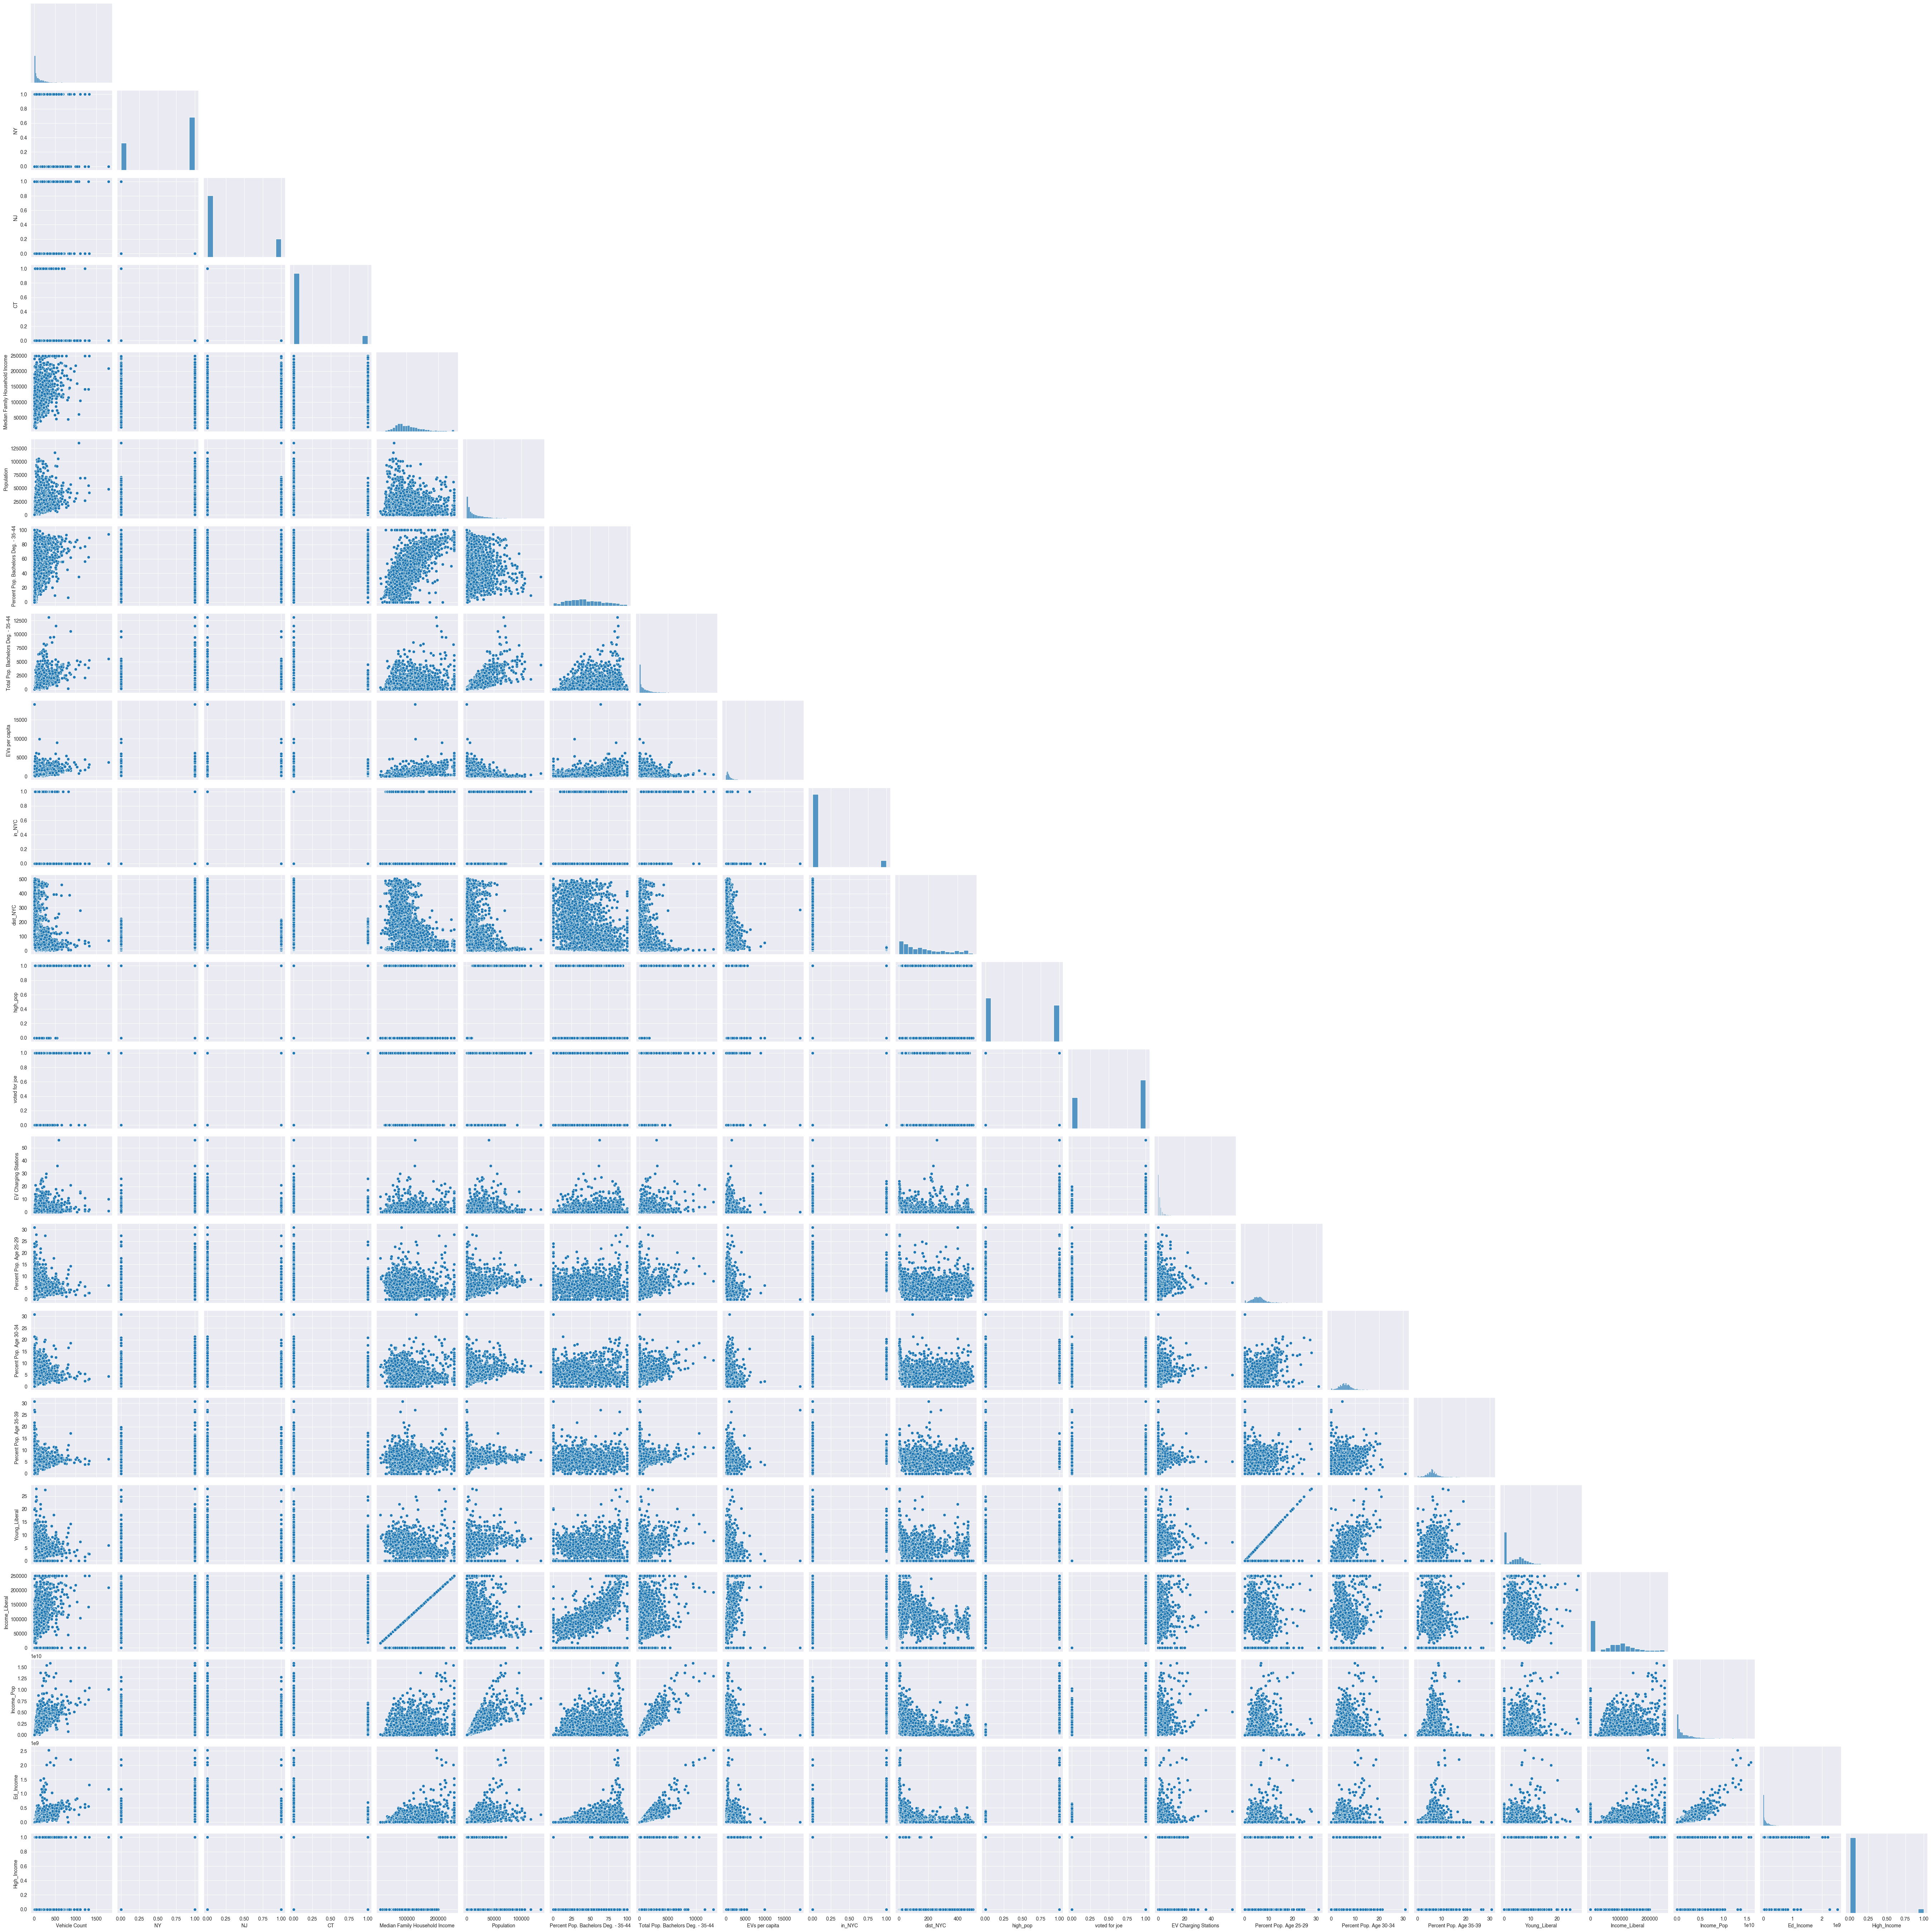

In [233]:
sns.pairplot(df_tri, corner=True);

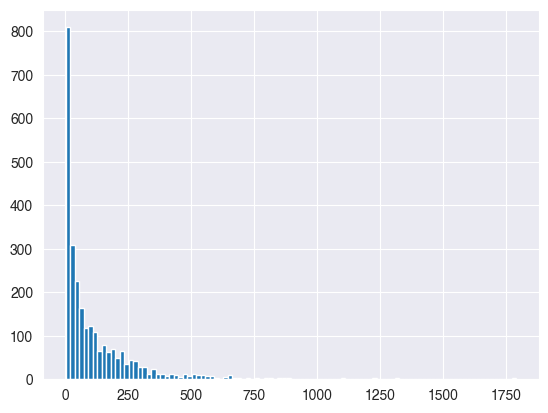

In [234]:
df_tri['Vehicle Count'].hist(bins=100);

In [235]:
df_tri['Vehicle Count'].std()

168.35341685447887

In [236]:
# Per the above, we are removing outliers in our data and giving a generous buffer of over 4 standard deviations
df_tri = df_tri.loc[(df_tri['Vehicle Count'] <= 750)]

# First Simple Models

### Testing Out A Rough Model - Linear Regression
My first model below is a simple, linear regression where I continue to feed in different features and continue to toggle with different features as they affect EV registrations.  This model is continually updated as I continue to explore my data.  Future enhancements include adding in more gender data (e.g. indicating if there is a gender imbalance in a zip code), adding in a "NYC Suburb Feature" as well as other geographic features, and possibly another feature indicating if the zip code is in a college town.

**NOTE:** This model is a work in progress, and not my main model - this model helps me to understand the coefficients and significance of certain features.  This model predicts the overall number of EVs registered in a zip code.  Please see my second, categorical model below for more information.  

In [237]:
import statsmodels.api as sm
import numpy as np

In [238]:
y = df_tri['Vehicle Count']
X = df_tri[['Median Family Household Income', 'Population', 'Percent Pop. Bachelors Deg. - 35-44', 
            'dist_NYC', 'high_pop', 'voted for joe', 'in_NYC', 'EV Charging Stations', 'CT', 
            'Percent Pop. Age 25-29', 'Percent Pop. Age 30-34', 'Percent Pop. Age 35-39', 'High_Income', 
           'Young_Liberal', 'Income_Liberal', 'Income_Pop', 'Ed_Income']]

In [239]:
model = sm.OLS(y, sm.add_constant(X))

In [240]:
results = model.fit()

In [241]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vehicle Count   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     367.9
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:15:48   Log-Likelihood:                -14913.
No. Observations:                2614   AIC:                         2.986e+04
Df Residuals:                    2596   BIC:                         2.997e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -46.7285     11.881     -3.933      0.000     -70.027     -23.430
Median Family Household Income          0.0004   9.01e-05      4.880      0.000       0.000       0.001
Population                              0.0011      0.000      3.891      0.000       0.001       0.002
Percent Pop. Bachelors Deg. - 35-44     0.8232      0.094      8.732      0.000       0.638       1.008
dist_NYC                               -0.0047      0.014     -0.345      0.730      -0.032       0.022
high_pop                               56.2602      4.442     12.665      0.000      47.550      64.971
voted for joe                          -2.3963     11.791     -0.203      0.839     -25.517      20.724
in_NYC                               -128.3487      7.064    -18.169      0.000    -142.201    -114.497
EV Charging Stations                    2.9701      0.516      5.756      0.000       1.958       3.982
CT                                    -18.0239      4.843     -3.722      0.000     -27.520      -8.528
Percent Pop. Age 25-29                 -0.6321      0.774     -0.817      0.414      -2.149       0.885
Percent Pop. Age 30-34                 -2.7355      0.586     -4.671      0.000      -3.884      -1.587
Percent Pop. Age 35-39                  0.6824      0.594      1.148      0.251      -0.483       1.848
High_Income                           -20.7122      9.203     -2.251      0.024     -38.759      -2.666
Young_Liberal                          -3.3500      1.005     -3.333      0.001      -5.321      -1.379
Income_Liberal                          0.0002   8.72e-05      2.585      0.010    5.45e-05       0.000
Income_Pop                            3.69e-08   3.81e-09      9.676      0.000    2.94e-08    4.44e-08
Ed_Income                           -4.868e-08   2.37e-08     -2.057      0.040   -9.51e-08   -2.27e-09
==============================================================================
Omnibus:                     1022.192   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9354.826
Skew:                           1.593   Prob(JB):                         0.00
Kurtosis:                      11.702   Cond. No.                     2.68e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing out a rough model - Categorical Regression
This second simple model is a categorical regression where, instead of predicting the total number of EV registrations in a zip code, I am predicting the number of EV registrations per capita (number of EVs per 100,000 people).  The target is separated into three categories: (1) if a zip code has a below-average number of EVs per 100k, (2) if a zip code has an above average number of EVs per 100k, and (3) if a zip code has a very high number of EVs per capita.  I determined these targets after analyzing the spread of my target variable below.

Median EVs per capita in Data Set: 606.3505135880629


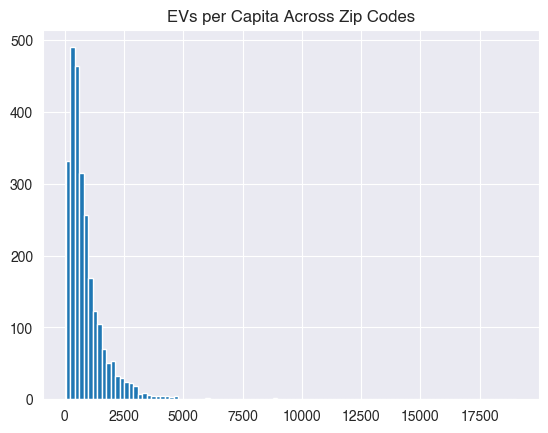

In [242]:
print("Median EVs per capita in Data Set:", df_tri['EVs per capita'].median())
df_tri['EVs per capita'].hist(bins=100).set(Title='EVs per Capita Across Zip Codes');

In [243]:
df_tri['EVs per capita'].std()

894.0797093855226

In [244]:
# Creating new variable indicating if zip code has high number of EVs per capita per my note above.
EVs_capita = df_tri['EVs per capita']
high_EVs = []

for EVs in EVs_capita:
    if EVs >= 2000:
        high_EVs.append(2)
    elif EVs >= 600:
        high_EVs.append(1)
    else:
        high_EVs.append(0)

df_tri['High EVs Per Capita'] = high_EVs

In [245]:
y = df_tri['High EVs Per Capita']
X = df_tri[['Median Family Household Income', 'Population', 'Percent Pop. Bachelors Deg. - 35-44', 
            'dist_NYC', 'high_pop', 'voted for joe', 'in_NYC', 'EV Charging Stations', 'NY', 'CT', 'High_Income', 
           'Young_Liberal', 'Income_Liberal', 'Income_Pop', 'Ed_Income']]

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [247]:
# NOTE: MAYBE USE SMOTE HERE?

**Logistic Regression**

In [248]:
# Build a pipeline with StandardScaler and Logistic Regression
scaled_pipeline_1 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 42))])

In [249]:
# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on training and test sets
print("Accuracy Score of Training Data:", scaled_pipeline_1.score(X_train, y_train))
print("Accuracy Score of Test Data:", scaled_pipeline_1.score(X_test, y_test))

Accuracy Score of Training Data: 0.7731000546746856
Accuracy Score of Test Data: 0.7643312101910829


**Random Forest Classifier**

In [250]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state = 42))])

In [251]:
# Fit the training data to pipeline
scaled_pipeline_2.fit(X_train, y_train)

# Print the accuracy on test set
print("Accuracy Score of Training Data:", scaled_pipeline_2.score(X_train, y_train))
print("Accuracy Score of Test Data:", scaled_pipeline_2.score(X_test, y_test))

Accuracy Score of Training Data: 1.0
Accuracy Score of Test Data: 0.8178343949044586


**Gridsearch**

In [252]:
# Define the grid
grid = [{'RF__max_depth': [2, 6, 8, 10], 
         'RF__min_samples_split': [2, 3], 
         'RF__min_samples_leaf': [3, 5]}]

In [253]:
# Define a grid search
gridsearch = GridSearchCV(estimator = scaled_pipeline_2, param_grid = grid, scoring = 'accuracy', cv = 5)

In [254]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Printing the Best Parameters for our Model
best_params = gridsearch.best_params_
print(best_params)

{'RF__max_depth': 10, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 2}


In [255]:
# Print the accuracy on training and test sets
print("Accuracy Score of Training Data:", gridsearch.score(X_train, y_train))
print("Accuracy Score of Test Data:", gridsearch.score(X_test, y_test))

Accuracy Score of Training Data: 0.8808091853471842
Accuracy Score of Test Data: 0.7961783439490446


In [256]:
# Finding Feature Importance from Our Random Forest Model
importances = scaled_pipeline_2.named_steps['RF'].feature_importances_

# Creating List of Tuples with Feature Names and Importances
feature_importances = [(feature, importance) for feature, importance in zip(X.columns, importances)]
feature_importances

[('Median Family Household Income', 0.20737520323752828),
 ('Population', 0.09775370462781413),
 ('Percent Pop. Bachelors Deg. - 35-44', 0.16107580802819496),
 ('dist_NYC', 0.10445554833522008),
 ('high_pop', 0.007728187714129101),
 ('voted for joe', 0.00798009801317599),
 ('in_NYC', 0.018226417830588596),
 ('EV Charging Stations', 0.027905501106801678),
 ('NY', 0.014719907323005208),
 ('CT', 0.005612285367505896),
 ('High_Income', 0.014467401869054562),
 ('Young_Liberal', 0.055594697522529206),
 ('Income_Liberal', 0.10471189890784355),
 ('Income_Pop', 0.0840190094595985),
 ('Ed_Income', 0.08837433065701022)]

In [257]:
df_tri.to_csv('Cleaned_EV_Reg_Data')